Review

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

fruits = pd.read_table('fruit_colors.txt')

X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']


fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn2 = KNeighborsClassifier(n_neighbors = 3)
knn3 = KNeighborsClassifier(n_neighbors = 5)

avg1 = 0
avg2 = 0
avg3 = 0

for i in range(10):
  X_train,X_test, y_train, y_test = train_test_split(X, y)
  knn1.fit(X_train,y_train)
  knn2.fit(X_train,y_train)
  knn3.fit(X_train,y_train)


  avg1 += knn1.score(X_test,y_test)
  avg2 += knn2.score(X_test,y_test)
  avg3 += knn3.score(X_test,y_test)

avg1 /= 10
avg2 /= 10
avg3 /= 10

print(avg1, "   ", avg2, "   ", avg3)

0.6733333333333333     0.6466666666666666     0.5266666666666666


Synthetic Datasets

Regression

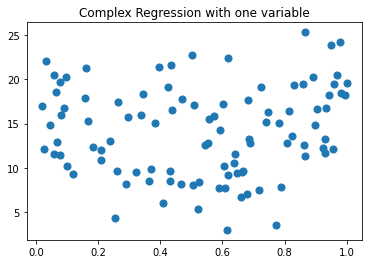

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1

plt.figure()
plt.title('Complex Regression with one variable')
x_f1, y_f1 = make_friedman1(n_samples = 100, n_features= 7, random_state = 0)
plt.scatter(x_f1[:, 2], y_f1, marker = 'o', s=50)
plt.show()

Binary Classification

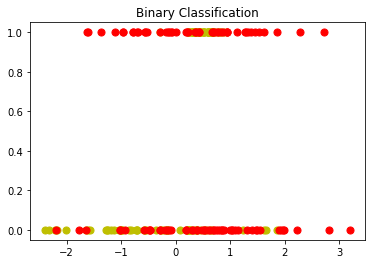

In [57]:
from sklearn.datasets import make_classification

plt.figure()
plt.title('Binary Classification')
x_c1, y_c1 = make_classification(n_samples = 100, n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, flip_y = 0.1,class_sep = 0.5, random_state = 0)
plt.scatter(x_c1[:, 0], y_c1, s = 50, c = 'y')
plt.scatter(x_c1[:, 1], y_c1, s = 50, c = 'r')

plt.show()

Knn Regression

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

fruits = pd.read_table('fruit_colors.txt')
x = fruits[['mass', 'width','height', 'color_score']]
y = fruits['fruit_label']

x_train, x_test, y_train, y_test = train_test_split(x, y)

knn = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)
print('R sq. test score', knn.score(x_test, y_test))

R sq. test score -0.07323232323232354


Linear Regression

In [0]:
# Preprocess Data
fruits = pd.read_table('fruit_colors.txt')
x = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

linreg = LinearRegression().fit(x_train, y_train)
print(linreg.intercept_)
print(linreg.coef_)

7.21689214603853
[ 0.01326767 -1.52322969  0.51398536]


0.8699308441964831


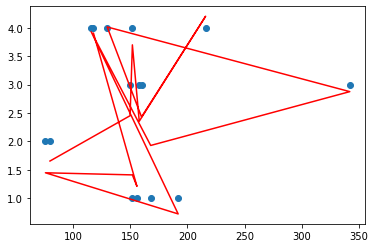

In [61]:
plt.figure()
plt.scatter(x_test.iloc[:, 0], y_test)
plt.plot(x_test.iloc[:, 0], linreg.predict(x_test), color= 'r')
print(linreg.score(x_test, y_test))

Ridge Regression

In [62]:
from sklearn.linear_model import Ridge

rigreg = Ridge().fit(x_train, y_train)
rigreg.score(x_test, y_test)

0.838048865986234